In [2]:
import pandas as pd

In [6]:
df_bookings=pd.read_csv(r"source-code/3_project_hospitality_analysis/datasets/fact_bookings.csv")
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [10]:
df_bookings.shape

(134590, 12)

In [12]:
df_bookings['room_category'].unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [13]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [14]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

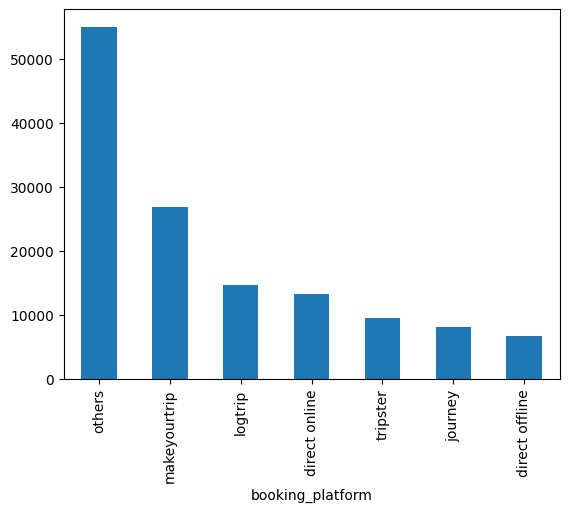

In [21]:
df_bookings.booking_platform.value_counts().plot(kind='bar')

In [22]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [24]:
df_date=pd.read_csv(r"source-code/3_project_hospitality_analysis/datasets/dim_date.csv")
df_hotels=pd.read_csv(r"source-code/3_project_hospitality_analysis/datasets/dim_hotels.csv")
df_rooms=pd.read_csv(r"source-code/3_project_hospitality_analysis/datasets/dim_rooms.csv")
df_agg_bookings=pd.read_csv(r"source-code/3_project_hospitality_analysis/datasets/fact_aggregated_bookings.csv")



In [25]:
df_hotels.shape

(25, 4)

In [26]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


<Axes: xlabel='city'>

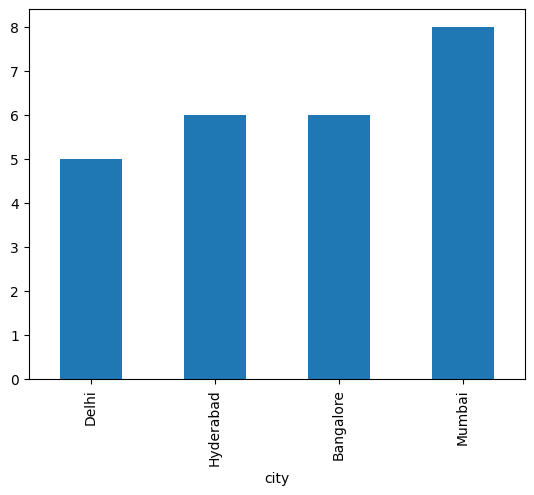

In [33]:
df_hotels.city.value_counts().sort_values().plot(kind='bar')

In [35]:
# eg1: Find out unique property ids in aggregate booking dataset
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [59]:
# eg2: Find out total bookings per property_id
df_agg_bookings.groupby('property_id').successful_bookings.sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [48]:
# eg3:Find out days on which bookings are greater than capacity
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

None


In [50]:
df_bookings

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [64]:
df_agg_bookings.capacity.max()

np.float64(50.0)

In [71]:
# Data Cleaning
df_bookings=pd.read_csv(r"source-code/3_project_hospitality_analysis/datasets/fact_bookings.csv")

df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [74]:

df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [76]:
df_bookings.shape

(134590, 12)

In [78]:
# here we saving only positive values
df_bookings=df_bookings[df_bookings.no_guests>=0]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [79]:
# Data Cleaning
# describe () is function
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134578.000000,134578.000000,56679.000000,1.345780e+05,134578.000000
mean,18061.143315,2.036744,3.619048,1.537804e+04,12696.011822
std,1093.053454,1.031710,1.234970,9.304015e+04,6927.841641
min,16558.000000,1.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [84]:
df_bookings=pd.read_csv(r"source-code/3_project_hospitality_analysis/datasets/fact_bookings.csv")
df_bookings
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [87]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [88]:
avg,std=df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()

In [89]:
avg,std

(np.float64(15378.05412734973), np.float64(93036.03867095453))

In [90]:
higher_limit=avg+3*std
higher_limit

np.float64(294486.17014021333)

In [92]:
lower_limit=avg-3*std
lower_limit

np.float64(-263730.06188551383)

In [93]:
df_bookings[df_bookings.revenue_generated>higher_limit]
# The below output table is outliers
# this are clearly errors,so we have to clean them by less than higher_limit

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [94]:
df_bookings[df_bookings.revenue_generated<higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [95]:
# NAN values
df_bookings.isnull()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,False,False,False,False,False,False,False,False,False,False,False,False
134586,False,False,False,False,False,False,False,False,False,False,False,False
134587,False,False,False,False,False,False,False,False,True,False,False,False
134588,False,False,False,False,False,False,False,False,False,False,False,False


In [96]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [99]:
df_bookings[df_bookings.ratings_given.isnull()]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
8,May012216558RT19,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,tripster,NaN,Checked Out,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134579,Jul312217564RT311,17564,30-07-22,31-07-22,2/8/2022,2.0,RT3,others,NaN,Checked Out,20400,20400
134580,Jul312217564RT41,17564,31-07-22,31-07-22,2/8/2022,1.0,RT4,direct online,NaN,Checked Out,32300,32300
134583,Jul312217564RT44,17564,31-07-22,31-07-22,1/8/2022,1.0,RT4,others,NaN,Cancelled,32300,12920
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920


In [102]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [108]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [119]:
median_capacity = df_agg_bookings.capacity.median()
df_agg_bookings.capacity.fillna(median_capacity, inplace=True)

C:\Users\chash\AppData\Local\Temp\ipykernel_24460\1152021952.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agg_bookings.capacity.fillna(median_capacity, inplace=True)


In [113]:
# eg2
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [121]:
# DATA TRANSFORMATION
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [140]:
df_agg_bookings['occ_cpt']=df_agg_bookings.successful_bookings	/df_agg_bookings.capacity

In [135]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_cpt
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,0.722222
9196,16559,31-Jul-22,RT4,13,18.0,0.722222
9197,17558,31-Jul-22,RT4,3,6.0,0.500000
9198,19563,31-Jul-22,RT4,3,6.0,0.500000


In [141]:
df_agg_bookings['occ_cpt']=df_agg_bookings['occ_cpt'].apply(lambda x:round(x*100, 1))
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_cpt
0,16559,1-May-22,RT1,25,30.0,83.3
1,19562,1-May-22,RT1,28,30.0,93.3
2,19563,1-May-22,RT1,23,30.0,76.7
3,17558,1-May-22,RT1,30,19.0,157.9
4,16558,1-May-22,RT1,18,19.0,94.7
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.2
9196,16559,31-Jul-22,RT4,13,18.0,72.2
9197,17558,31-Jul-22,RT4,3,6.0,50.0
9198,19563,31-Jul-22,RT4,3,6.0,50.0


In [142]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_cpt
0,16559,1-May-22,RT1,25,30.0,83.3
1,19562,1-May-22,RT1,28,30.0,93.3
2,19563,1-May-22,RT1,23,30.0,76.7
3,17558,1-May-22,RT1,30,19.0,157.9
4,16558,1-May-22,RT1,18,19.0,94.7
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.2
9196,16559,31-Jul-22,RT4,13,18.0,72.2
9197,17558,31-Jul-22,RT4,3,6.0,50.0
9198,19563,31-Jul-22,RT4,3,6.0,50.0


In [149]:
# what is avg occupancy rate in each of the room categories
df_agg_bookings.groupby('room_category')['occ_cpt'].mean()

room_category
RT1    58.232522
RT2    58.040348
RT3    58.028783
RT4    59.303609
Name: occ_cpt, dtype: float64

<Axes: ylabel='occ_cpt'>

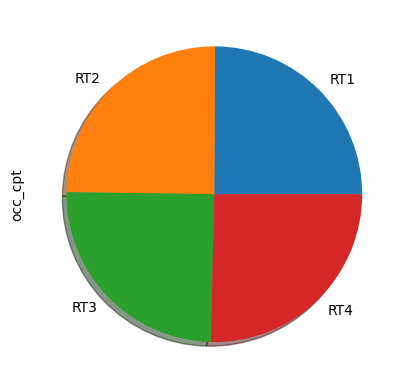

In [169]:
df_agg_bookings.groupby('room_category')['occ_cpt'].mean().round(2).plot(kind='pie',shadow=True)

In [151]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [154]:
# here in df_agg_bookings and df rooms no common column to merge
df=pd.merge(df_agg_bookings,df_rooms,left_on='room_category',right_on='room_id')
df


,property_id,check_in_date,room_category,successful_bookings,capacity,occ_cpt,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.3,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.3,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.7,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.9,RT1,Standard
4,16558,1-May-22,RT1,18,19.0,94.7,RT1,Standard
...,...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.2,RT4,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72.2,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.0,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.0,RT4,Presidential


In [160]:
df=pd.concat([df_agg_bookings,df_rooms])
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_cpt,room_id,room_class
0,16559.0,1-May-22,RT1,25.0,30.0,83.3,NaN,NaN
1,19562.0,1-May-22,RT1,28.0,30.0,93.3,NaN,NaN
2,19563.0,1-May-22,RT1,23.0,30.0,76.7,NaN,NaN
3,17558.0,1-May-22,RT1,30.0,19.0,157.9,NaN,NaN
4,16558.0,1-May-22,RT1,18.0,19.0,94.7,NaN,NaN
...,...,...,...,...,...,...,...,...
9199,17561.0,31-Jul-22,RT4,3.0,4.0,75.0,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,RT1,Standard
1,NaN,NaN,NaN,NaN,NaN,NaN,RT2,Elite
2,NaN,NaN,NaN,NaN,NaN,NaN,RT3,Premium


In [165]:
df=pd.merge(df,df_hotels,on='property_id')
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_cpt,room_id,room_class,property_name_x,category_x,city_x,property_name_y,category_y,city_y,property_name,category,city
0,16559.0,1-May-22,RT1,25.0,30.0,83.3,NaN,NaN,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
1,19562.0,1-May-22,RT1,28.0,30.0,93.3,NaN,NaN,Atliq Bay,Luxury,Bangalore,Atliq Bay,Luxury,Bangalore,Atliq Bay,Luxury,Bangalore
2,19563.0,1-May-22,RT1,23.0,30.0,76.7,NaN,NaN,Atliq Palace,Business,Bangalore,Atliq Palace,Business,Bangalore,Atliq Palace,Business,Bangalore


In [163]:
df_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [166]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [171]:
df=pd.merge(df,df_date,left_on='check_in_date',right_on='date')
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_cpt,room_id,room_class,property_name_x,category_x,...,property_name_y,category_y,city_y,property_name,category,city,date,mmm yy,week no,day_type
0,19563.0,10-May-22,RT3,15.0,29.0,51.7,NaN,NaN,Atliq Palace,Business,...,Atliq Palace,Business,Bangalore,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560.0,10-May-22,RT1,19.0,30.0,63.3,NaN,NaN,Atliq City,Business,...,Atliq City,Business,Hyderabad,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562.0,10-May-22,RT1,18.0,30.0,60.0,NaN,NaN,Atliq Bay,Luxury,...,Atliq Bay,Luxury,Bangalore,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563.0,10-May-22,RT1,16.0,30.0,53.3,NaN,NaN,Atliq Palace,Business,...,Atliq Palace,Business,Bangalore,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
4,17558.0,10-May-22,RT1,11.0,19.0,57.9,NaN,NaN,Atliq Grands,Luxury,...,Atliq Grands,Luxury,Mumbai,Atliq Grands,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,16563.0,31-Jul-22,RT4,13.0,18.0,72.2,NaN,NaN,Atliq Palace,Business,...,Atliq Palace,Business,Delhi,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend
6496,16559.0,31-Jul-22,RT4,13.0,18.0,72.2,NaN,NaN,Atliq Exotica,Luxury,...,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend
6497,17558.0,31-Jul-22,RT4,3.0,6.0,50.0,NaN,NaN,Atliq Grands,Luxury,...,Atliq Grands,Luxury,Mumbai,Atliq Grands,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend
6498,19563.0,31-Jul-22,RT4,3.0,6.0,50.0,NaN,NaN,Atliq Palace,Business,...,Atliq Palace,Business,Bangalore,Atliq Palace,Business,Bangalore,31-Jul-22,Jul 22,W 32,weekend


In [175]:
df.groupby('day_type')['occ_cpt'].mean()

day_type
weekeday    50.904304
weekend     72.394895
Name: occ_cpt, dtype: float64

In [180]:
# In the month of june what is occupancy of different cities
df.groupby('mmm yy')['occ_cpt']

In [181]:
df['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [182]:
df[df['mmm yy']=='Jun 22']

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_cpt,room_id,room_class,property_name_x,category_x,...,property_name_y,category_y,city_y,property_name,category,city,date,mmm yy,week no,day_type
2200,16559.0,10-Jun-22,RT1,20.0,30.0,66.7,NaN,NaN,Atliq Exotica,Luxury,...,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562.0,10-Jun-22,RT1,19.0,30.0,63.3,NaN,NaN,Atliq Bay,Luxury,...,Atliq Bay,Luxury,Bangalore,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563.0,10-Jun-22,RT1,17.0,30.0,56.7,NaN,NaN,Atliq Palace,Business,...,Atliq Palace,Business,Bangalore,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2203,17558.0,10-Jun-22,RT1,9.0,19.0,47.4,NaN,NaN,Atliq Grands,Luxury,...,Atliq Grands,Luxury,Mumbai,Atliq Grands,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,16558.0,10-Jun-22,RT1,11.0,19.0,57.9,NaN,NaN,Atliq Grands,Luxury,...,Atliq Grands,Luxury,Delhi,Atliq Grands,Luxury,Delhi,10-Jun-22,Jun 22,W 24,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,17562.0,30-Jun-22,RT4,3.0,6.0,50.0,NaN,NaN,Atliq Bay,Luxury,...,Atliq Bay,Luxury,Mumbai,Atliq Bay,Luxury,Mumbai,30-Jun-22,Jun 22,W 27,weekeday
4296,19563.0,30-Jun-22,RT4,3.0,6.0,50.0,NaN,NaN,Atliq Palace,Business,...,Atliq Palace,Business,Bangalore,Atliq Palace,Business,Bangalore,30-Jun-22,Jun 22,W 27,weekeday
4297,16560.0,30-Jun-22,RT4,3.0,7.0,42.9,NaN,NaN,Atliq City,Business,...,Atliq City,Business,Delhi,Atliq City,Business,Delhi,30-Jun-22,Jun 22,W 27,weekeday
4298,19558.0,30-Jun-22,RT4,3.0,7.0,42.9,NaN,NaN,Atliq Grands,Luxury,...,Atliq Grands,Luxury,Bangalore,Atliq Grands,Luxury,Bangalore,30-Jun-22,Jun 22,W 27,weekeday
